## Ejemplo de Dotplots

En este tutorial comentaremos el ejemplo12.py utilizando [Biopython](https://biopython.org/) para cargar las secuencias y una rutina propia para generar un Dotplot. 

Previamente debemos tener los datos de las secuencias a alinear o a comparar guardadas en un archivo en formato FASTA (por ejemplo la clásica "ls_orchid.fasta", que son dos secuencias de genes de orquídeas. Se pueden descargar aquí:

+ La [Orquídea Pelicano](https://es.wikipedia.org/wiki/Cypripedium_irapeanum) cuya secuencia se puede descargar del siguiente [enlace (C. irapeanum)](https://www.ncbi.nlm.nih.gov/nuccore/Z78533.1), cuyo código en genbank es **Z78533.1**
+ La [Cypripedium californicum](https://es.wikipedia.org/wiki/Cypripedium_californicum), se puede descargar del enlace [C.californicum](https://www.ncbi.nlm.nih.gov/nuccore/Z78532.1), cuyo código en genbank es **Z78532.1**

Primero importamos la herramienta SeqIO que sirve para importar los datos.

In [1]:
from Bio import SeqIO

Creo un string con el nombre de archivo y defino el tamaño de ventana.

In [2]:
archivo = "ls_orchid.fasta"
window = 8

Luego abro el archivo y lo guardo en secuencias separadas

In [14]:
with open(archivo) as in_handle:
    record_iterator = SeqIO.parse(in_handle, "fasta")
    rec_one = next(record_iterator)
    rec_two = next(record_iterator)
    
print(rec_one)
print('------------')
print(str(rec_one.seq))
print('Longitud del string: ',len(str(rec_one.seq)))

ID: gi|2765658|emb|Z78533.1|CIZ78533
Name: gi|2765658|emb|Z78533.1|CIZ78533
Description: gi|2765658|emb|Z78533.1|CIZ78533 C.irapeanum 5.8S rRNA gene and ITS1 and ITS2 DNA
Number of features: 0
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGG...CGC', SingleLetterAlphabet())
------------
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGGAATAAACGATCGAGTGAATCCGGAGGACCGGTGTACTCAGCTCACCGGGGGCATTGCTCCCGTGGTGACCCTGATTTGTTGTTGGGCCGCCTCGGGAGCGTCCATGGCGGGTTTGAACCTCTAGCCCGGCGCAGTTTGGGCGCCAAGCCATATGAAAGCATCACCGGCGAATGGCATTGTCTTCCCCAAAACCCGGAGCGGCGGCGTGCTGTCGCGTGCCCAATGAATTTTGATGACTCTCGCAAACGGGAATCTTGGCTCTTTGCATCGGATGGAAGGACGCAGCGAAATGCGATAAGTGGTGTGAATTGCAAGATCCCGTGAACCATCGAGTCTTTTGAACGCAAGTTGCGCCCGAGGCCATCAGGCTAAGGGCACGCCTGCTTGGGCGTCGCGCTTCGTCTCTCTCCTGCCAATGCTTGCCCGGCATACAGCCAGGCCGGCGTGGTGCGGATGTGAAAGATTGGCCCCTTGTGCCTAGGTGCGGCGGGTCCAAGAGCTGGTGTTTTGATGGCCCGGAACCCGGCAAGAGGTGGACGGATGCTGGCAGCAGCTGCCGTGCGAATCCCCCATGTTGTCGTGCTTGTCGGACAGGCAGGAGAACCCTTCCGAACCCCAATGGAGGGCGGTTGACCGCCATTCGGATGT

Se podría utilizar la función pairwise2.align.globalms, que justamente realiza los alineamientos globales de las dos secuencias aunque lleva mucho tiempo de cálculo porque las secuencias son muy largas. Por eso es interesante estudiar los potenciales alineamientos con los **dotplots**.

Para desarrollar los dotplots se pueden guardar las secuencias en diccionarios con palabras del ancho de la ventana definida. 

In [20]:
dict_one = {}
dict_two = {}
for (seq, section_dict) in [(str(rec_one.seq).upper(), dict_one),(str(rec_two.seq).upper(), dict_two)]:
    for i in range(len(seq) - window):
        section = seq[i : i + window]
        try:
            section_dict[section].append(i)
        except KeyError:
            section_dict[section] = [i]


Luego se realiza la intersección (función propia de diccionarios de python).

In [19]:
matches = set(dict_one).intersection(dict_two)
print("%i matches " % len(matches))


207 matches 


Ahora creo las listas de coordenadas de dónde están las coincidencias para poder graficarlos.

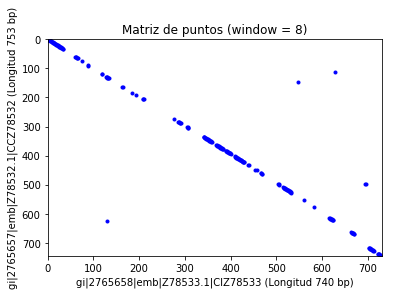

In [22]:
x = []
y = []
for section in matches:
    for i in dict_one[section]:
        for j in dict_two[section]:
            x.append(i)
            y.append(j)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(x, y, '.b')
 
ax.set_xlim(0, len(rec_one) - window)
ax.set_ylim(len(rec_two) - window,0)
#ax.invert_yaxis()
ax.set_xlabel("%s (Longitud %i bp)" % (rec_one.id, len(rec_one)))
ax.set_ylabel("%s (Longitud %i bp)" % (rec_two.id, len(rec_two)))
ax.set_title("Matriz de puntos (window = %i)" % window)

plt.show()

